<a href="https://colab.research.google.com/github/kavinCodes/ML_portfolio/blob/master/NN_Equation_Solver_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.utils import normalize

Using TensorFlow backend.


##**Importing data and visualizing it**

In [0]:
mnist = keras.datasets.mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


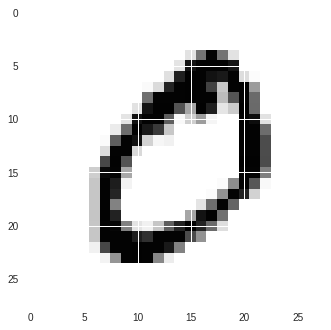

In [0]:
plt.imshow(x_train[1])
# plt.show() # this was needed to actually print the drawn image produced by imshow in the past

In [0]:
x_train_norm = normalize(x_train)
x_test_norm = normalize(x_test)

## **Building the model**

In [0]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 18s 293us/step - loss: 0.2630 - acc: 0.9218
Epoch 2/3
60000/60000 [==============================] - 17s 279us/step - loss: 0.1096 - acc: 0.9664
Epoch 3/3
60000/60000 [==============================] - 17s 282us/step - loss: 0.0749 - acc: 0.9758


In [0]:
test_loss, test_acc = model.evaluate(x_test_norm, y_test)

10000/10000 [==============================] - 0s 34us/step


In [0]:
print('Test loss is {} \nTest accuracy is {}'.format(test_loss, test_acc))

Test loss is 0.08722381408987567 
Test accuracy is 0.9734


## **Trying out NN prediction of the equation:** $$y = \sqrt[3]{x}$$

In [35]:
## defining test and train sets
x = np.random.rand(1000)*1000
x_num_train = x[:800]
x_num_test = x[800:]

## defining test and train labels
def cube_root(x):
  return np.cbrt(x)

y_num_train = cube_root(x_num_train)
y_num_test = cube_root(x_num_test)

x_num_train = x_num_train.reshape((-1,1))
x_num_test = x_num_test.reshape((-1,1))
print(x_num_train.shape, x_num_test.shape)
# print(y_num_train.shape, y_num_test.shape)

(800, 1) (200, 1)


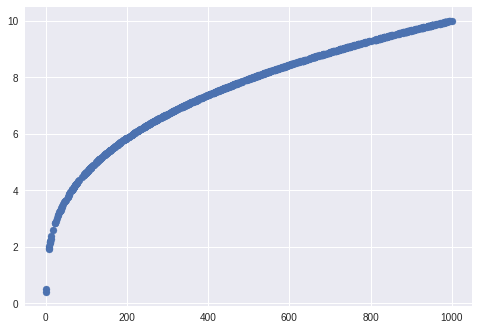

In [36]:
plt.scatter(x_num_train,y_num_train)

In [61]:
x_grid_train = np.random.rand(1000,1)
y_grid_train = np.random.rand(1000,1)
labels_train = y_grid_train >= cube_root(x_grid_train)

labels_train = labels_train.astype('int')
combined_train = np.concatenate((x_grid_train, y_grid_train), axis=1)
combined_train.shape

(1000, 2)

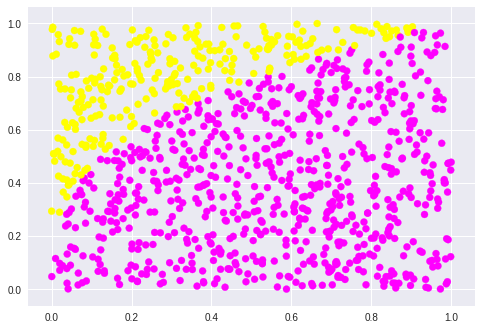

In [85]:
plt.scatter(x_grid_train, y_grid_train, c=labels_train, cmap='spring')

In [0]:
model_2 = Sequential()

model_2.add(Dense(128, activation=tf.nn.relu))
model_2.add(Dense(128, activation=tf.nn.relu))
model_2.add(Dense(1, activation=tf.nn.relu))



In [65]:
model_2.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
model_2.fit(combined_train, labels_train, epochs=6)

Epoch 1/6
1000/1000 [==============================] - 1s 725us/step - loss: 0.1374 - acc: 0.7870
Epoch 2/6
1000/1000 [==============================] - 0s 49us/step - loss: 0.0732 - acc: 0.9440
Epoch 3/6
1000/1000 [==============================] - 0s 73us/step - loss: 0.0565 - acc: 0.9450
Epoch 4/6
1000/1000 [==============================] - 0s 51us/step - loss: 0.0555 - acc: 0.9300
Epoch 5/6
1000/1000 [==============================] - 0s 56us/step - loss: 0.0482 - acc: 0.9480
Epoch 6/6
1000/1000 [==============================] - 0s 55us/step - loss: 0.0456 - acc: 0.9530


In [0]:
x_grid_test = np.random.rand(200,1)
y_grid_test = np.random.rand(200,1)
labels_test = y_grid_test >= cube_root(x_grid_test)
labels_test = labels_test.astype('int')

combined_test = np.concatenate((x_grid_test, y_grid_test), axis=1)

In [74]:
test_loss, test_acc = model_2.evaluate(combined_test, labels_test)

print(test_loss, test_acc)

200/200 [==============================] - 0s 85us/step
0.03184292078018189 0.975


In [86]:
labels_test_predict = np.round(model_2.predict(combined_test))
print(labels_test_predict.shape)
print(labels_test.shape)


(200, 1)
(200, 1)


In [93]:
type(combined_test[:,0])

numpy.ndarray

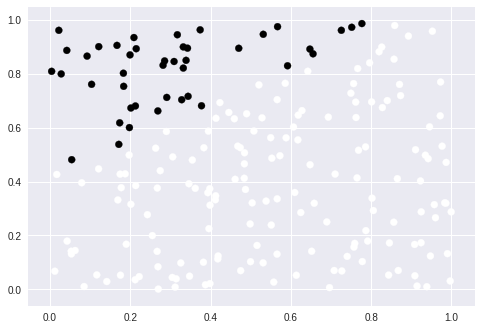

In [96]:
plt.scatter(x_grid_test, y_grid_test, c=labels_test_predict)

To Do:
1. Hold the test plot and draw a line of predictions 